<a href="https://colab.research.google.com/github/CHANDANAHEGADE/Unsupervised-learning/blob/main/TSNE_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
 
import numpy as np
import pandas as pd
 
# For plotting
import matplotlib.pyplot as plt
 
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})
 
#For standardising the dat
from sklearn.preprocessing import StandardScaler
 
#Importing t-SNE
from sklearn.manifold import TSNE
 
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New_digite_tsne_dataset.csv to New_digite_tsne_dataset.csv


In [ ]:
#Reading the dataset
data=pd.read_csv('New_digite_tsne_dataset.csv')
#Sample dataset
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Dimensionality of the dataset
data.shape

(10000, 785)

In [ ]:
#Extracting required variables and assigning them for further analysis
y = data.loc[:,'label'].values
x = data.loc[:,'pixel0':].values
print(x.shape)
print(y)

(10000, 784)
[1 0 1 ... 4 7 9]


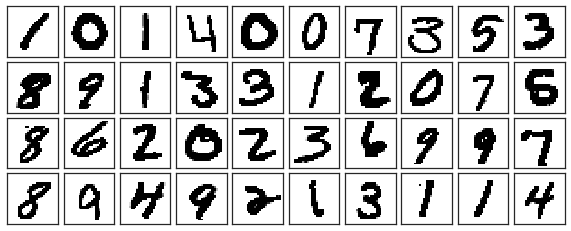

In [ ]:
#Plotting the original data
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [ ]:
# Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(10000, 784)


In [ ]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 
x_subset = x[0:10000]
y_subset = y[0:10000]
unique=np.unique(y_subset)
print(unique)

[0 1 2 3 4 5 6 7 8 9]


# t-SNE
t-SNE or T-distributed stochastic neighbour embedding takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.

###Here is how t-SNE basically works:

1. First, a probability distribution is created in a high dimensional space. This means if we pick a point in the dataset, we define the probability of picking another point as a neighbour.
2. Next, a low dimensional space is then created that has the same(or as near as possible) probability distribution as the high Dimensional space.

In [ ]:
# Applying t-SNE on the data for 2 dimension
RS=123
time_start = time.time()
tsne = TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(x_subset)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.085s...
[t-SNE] Computed neighbors for 10000 samples in 180.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 434.765849
[t-SNE] KL divergence after 250 iterations with early exaggeration: 362.907288
[t-SNE] KL divergence after 500 iterations: 2.097179
t-SNE Time elapsed: 

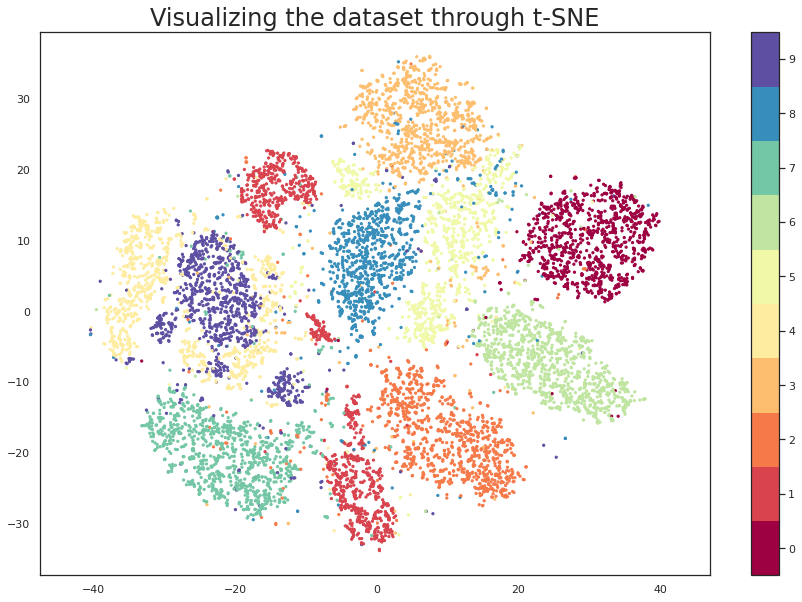

In [ ]:
#2D scatter plot 
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing the dataset through t-SNE', fontsize=24);

In [ ]:
#Using PCA to reduce dimensions of data before feeding to t-SNE algorithm
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [ ]:
# Using the output of PCA as input for t-SNE
import time
RS=123
time_start = time.time()
pca_tsne = TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(pca_result_50)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.070s...
[t-SNE] Computed neighbors for 10000 samples in 13.648s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 348.618187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 364.529846
[t-SNE] KL divergence after 500 iterations: 2.056151
t-SNE Time elapsed: 8

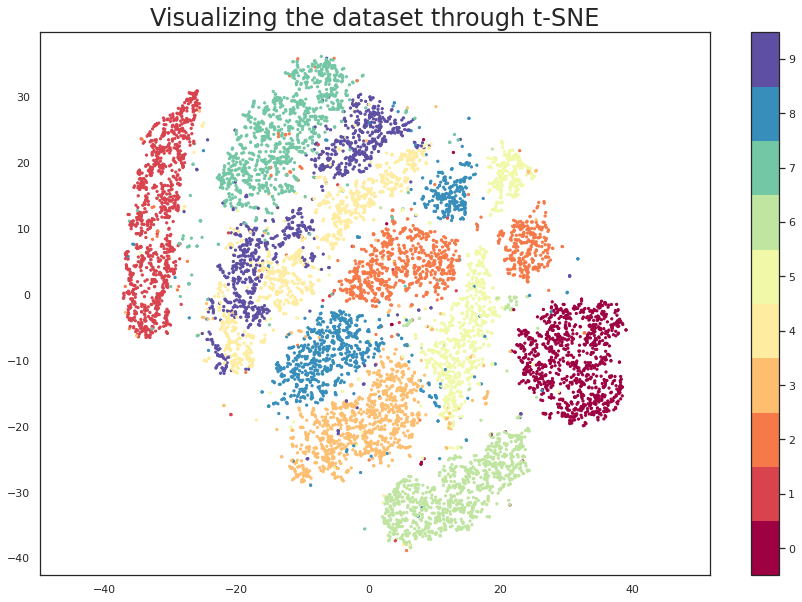

In [ ]:
#visualising t-SNE again with 2D plot
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing the dataset through t-SNE', fontsize=24);

In [ ]:
# Applying t-SNE on the data for 3 dimension
import time
RS=123
time_start = time.time()
model = TSNE(n_components=3,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(pca_result_50)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.067s...
[t-SNE] Computed neighbors for 10000 samples in 12.468s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 348.618187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 364.529297
[t-SNE] KL divergence after 500 iterations: 1.750903
t-SNE Time elapsed: 2

In [ ]:
newmodel=pd.DataFrame(model, columns=['Column1', 'Column2', 'Column3']) #f = pd. DataFrame(np_array, columns=['Column1', 'Column2'])
newmodel['sub']=y_subset
newmodel

,Column1,Column2,Column3,sub
0,3.886017,14.037550,7.218733,1
1,-14.384821,-3.665914,-6.082119,0
2,0.772463,-0.602114,15.022317,1
3,2.216272,-7.229596,1.935780,4
4,-14.610864,-4.066185,-6.611589,0
...,...,...,...,...
9995,-4.770675,0.526582,-0.822527,5
9996,-12.611153,4.464367,-4.688185,0
9997,10.597767,5.984827,-8.804650,4
9998,15.068660,-2.025353,9.866899,7


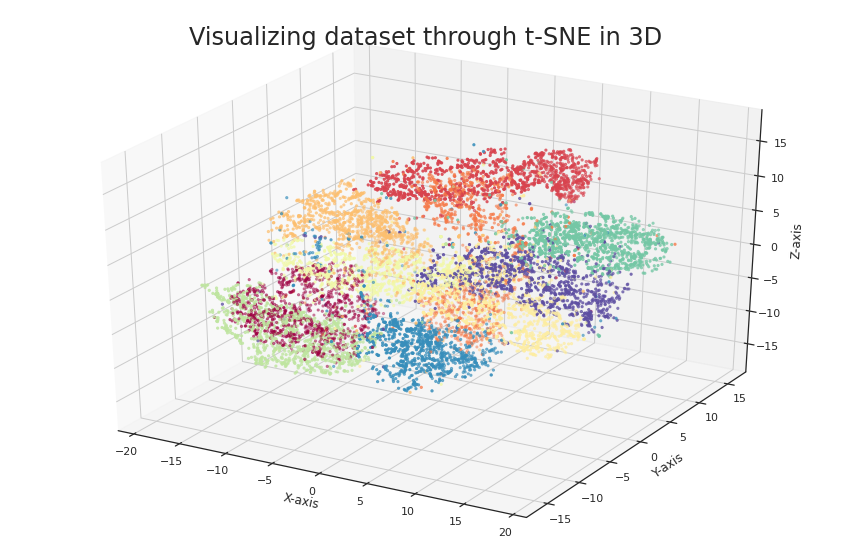

In [ ]:
#visualising t-SNE with 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newmodel['Column1'], newmodel['Column2'], newmodel['Column3'], s= 5, c=newmodel['sub'], cmap='Spectral')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('Visualizing dataset through t-SNE in 3D', fontsize=24);
plt.show()

In [ ]:
#visualising t-SNE with 3D plot with plotly
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(data=[go.Scatter3d(
    x=newmodel['Column1'],
    y=newmodel['Column2'],
    z=newmodel['Column3'],
    mode='markers',
    marker=dict(
        size=12,
        color=newmodel['sub'],                # set color to an array/list of desired values
        colorscale='Spectral',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
pio.show(fig)

In [ ]:
#Visualizing dataset through t-SNE with animated 3D plot
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
 
fig = px.scatter_3d(
    data_frame=newmodel,
    x=newmodel['Column1'],
    y=newmodel['Column2'],
    z=newmodel['Column3'],
    color=newmodel['sub'],
    template='plotly_dark',
    title='Visualizing dataset through t-SNE with animated 3D plot',
    hover_name=newmodel['sub'],
    height=700,
 
    animation_frame='sub',
    range_x=[-7,8],
    range_y=[-7,8],
    range_z=[-6,8]
)
 
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500
 
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
pio.show(fig)